# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

In [19]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [20]:
countries = pd.read_csv("countries.csv")

In [21]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [22]:
# Sua análise começa aqui.
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    object 
 5   Coastline_ratio   227 non-null    object 
 6   Net_migration     224 non-null    object 
 7   Infant_mortality  224 non-null    object 
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    object 
 10  Phones_per_1000   223 non-null    object 
 11  Arable            225 non-null    object 
 12  Crops             225 non-null    object 
 13  Other             225 non-null    object 
 14  Climate           205 non-null    object 
 15  Birthrate         224 non-null    object 
 16  Deathrate         223 non-null    object 
 1

In [23]:
#Selecionando colunas com vírgula
nomes_colunas = countries.columns.drop(['Country','Region','Population','Area','GDP'])
nomes_colunas = list(nomes_colunas)
nomes_colunas

['Pop_density',
 'Coastline_ratio',
 'Net_migration',
 'Infant_mortality',
 'Literacy',
 'Phones_per_1000',
 'Arable',
 'Crops',
 'Other',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service']

In [24]:
# Modificando nas colunas selecionadas vírgula para ponto e transformando-as em float  
countries[nomes_colunas] = countries[nomes_colunas].apply(lambda x: x.str.replace(',', '.').astype('float'))
countries

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [25]:
# Removendo espaços nas colunas Country e Region
countries['Country'] = countries['Country'].str.strip()
countries['Region'] = countries['Region'].str.strip()
countries

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [26]:
#Informação das colunas 
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    float64
 5   Coastline_ratio   227 non-null    float64
 6   Net_migration     224 non-null    float64
 7   Infant_mortality  224 non-null    float64
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    float64
 10  Phones_per_1000   223 non-null    float64
 11  Arable            225 non-null    float64
 12  Crops             225 non-null    float64
 13  Other             225 non-null    float64
 14  Climate           205 non-null    float64
 15  Birthrate         224 non-null    float64
 16  Deathrate         223 non-null    float64
 1

# Análise de Dados : Questão 1

In [27]:
# Selecionando as Regiões únicas em ordem alfabética
regioes = countries['Region'].sort_values().unique()
regioes = list(regioes)
regioes

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

# Análise de Dados: Questão 2

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [31]:
# Aplicando o KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
discretizer.fit(countries[['Pop_density']])
# Obtendo um array com os dados transformados
score_bins = discretizer.transform(countries[["Pop_density"]])
score_bins

array([[3.],
       [6.],
       [1.],
       [8.],
       [7.],
       [0.],
       [6.],
       [7.],
       [1.],
       [5.],
       [8.],
       [0.],
       [5.],
       [5.],
       [2.],
       [9.],
       [9.],
       [9.],
       [3.],
       [8.],
       [1.],
       [4.],
       [9.],
       [3.],
       [0.],
       [5.],
       [0.],
       [2.],
       [7.],
       [4.],
       [4.],
       [3.],
       [4.],
       [8.],
       [4.],
       [2.],
       [0.],
       [5.],
       [7.],
       [0.],
       [0.],
       [2.],
       [6.],
       [2.],
       [8.],
       [2.],
       [1.],
       [5.],
       [5.],
       [3.],
       [5.],
       [5.],
       [5.],
       [6.],
       [6.],
       [1.],
       [5.],
       [7.],
       [4.],
       [3.],
       [5.],
       [8.],
       [1.],
       [3.],
       [2.],
       [4.],
       [2.],
       [3.],
       [1.],
       [6.],
       [0.],
       [4.],
       [0.],
       [6.],
       [9.],
       [4.],
       [7.],

In [32]:
# Encontrando o percentil 90
q_90= np.quantile(score_bins, 0.9)
q_90

8.400000000000006

In [33]:
#Contando quantos valores estão acima do percentil 90
count = 0
for x in score_bins:
    if (x > q_90):
        count = count + 1
count    

23

# Análise de Dados: Questão 3

In [39]:
# Selecionando as colunas Region e Climate dos dados e criando um novo dataframe apenas com essas 2 colunas
region = countries['Region']
climate = countries['Climate']
new_dataframe=pd.concat([region, climate], axis=1)
new_dataframe

,Region,Climate
0,ASIA (EX. NEAR EAST),1.0
1,EASTERN EUROPE,3.0
2,NORTHERN AFRICA,1.0
3,OCEANIA,2.0
4,WESTERN EUROPE,3.0
...,...,...
222,NEAR EAST,3.0
223,NORTHERN AFRICA,1.0
224,NEAR EAST,1.0
225,SUB-SAHARAN AFRICA,2.0


In [40]:
# Transformando o valor nan em um valor médio dos dados na coluna Climate
new_dataframe = new_dataframe.fillna(new_dataframe.mean())

In [41]:
# Aplicando o one-hot encoding  usando a funçao get_dummies do Pandas
encoded_columns = pd.get_dummies(data=new_dataframe, columns=['Region', 'Climate'])
encoded_columns

,Region_ASIA (EX. NEAR EAST),Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Climate_1.0,Climate_1.5,Climate_2.0,Climate_2.1390243902439026,Climate_2.5,Climate_3.0,Climate_4.0
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
223,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
224,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
225,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [42]:
# Contando quantos novos atributos(colunas novas) foram criados
length_encoded = len(list(encoded_columns))
length_encoded

18

# Análise de Dados: Questão 4

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [45]:
#Criando a pipeline
pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("standard_scaler", StandardScaler())
    ])
pipeline

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standard_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

In [47]:
# Criando um novo dataframe apenas com valores numéricos
df_numeric = countries.select_dtypes(include=['float64','int64'])
df_numeric

,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [48]:
# Fazendo o ajuste dos dados do novo dataframe no pipeline 
pipeline_transf = pipeline.fit_transform(df_numeric)
pipeline_transf

array([[ 0.01969468,  0.02758332, -0.19984434, ...,  1.63657562,
        -0.31540576, -1.1611354 ],
       [-0.21387688, -0.31879748, -0.15360296, ...,  0.59516349,
        -0.70631815,  0.08342432],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.32662697,
         2.39091078, -1.67396905],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.08738364,
         1.4286649 , -1.0798325 ],
       [-0.14654488,  0.08642673, -0.21958445, ...,  0.51072467,
         0.06047154, -0.47944188],
       [-0.14029829, -0.11624192, -0.20992568, ...,  0.22222537,
        -0.29285312,  0.08342432]])

In [56]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [57]:
# Usando o pipeline no teste e encontrando o valor correspondente à variável Arable
result = pipeline.transform([test_country[2:]])
result[0][9]

-1.0468574255102998

In [58]:
result = float(result[0][9].round(3))

# Análise de Dados:Questão 5

In [60]:
# Criando um novo dataframe da coluna Net Migration do dataframe 
net_migration = countries['Net_migration']
net_migration

0      23.06
1      -4.93
2      -0.39
3     -20.71
4       6.60
       ...  
222     2.98
223      NaN
224     0.00
225     0.00
226     0.00
Name: Net_migration, Length: 227, dtype: float64

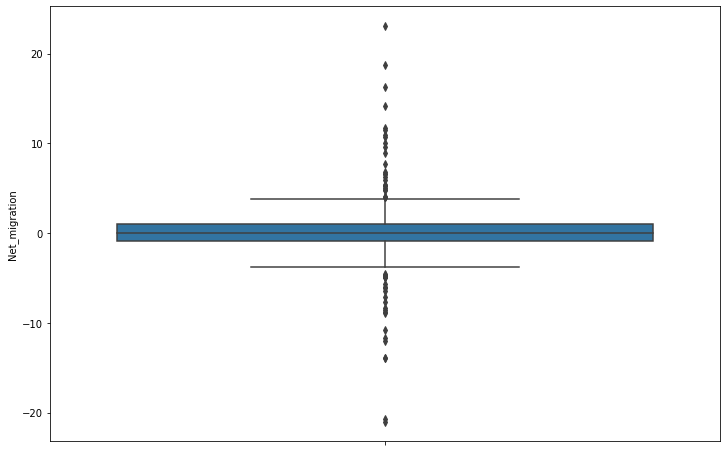

In [62]:
# Visualisando os dados da coluna selecionada num bloxpot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.boxplot(net_migration, orient="vertical");

In [63]:
# Aplicando o método do boxplot para encontrar a faixa dos dados considerada normal
q1 = net_migration.quantile(0.25)
q3 = net_migration.quantile(0.75)
iqr = q3 - q1

non_outlier_interval_iqr = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]

print(f"Faixa considerada \"normal\": {non_outlier_interval_iqr}")

Faixa considerada "normal": [-3.8149999999999995, 3.885]


In [64]:
# Descobrindo o número de outliers da variável
outliers_iqr = net_migration[(net_migration < non_outlier_interval_iqr[0]) | (net_migration > non_outlier_interval_iqr[1])]
len(outliers_iqr)

50

In [65]:
# Encontrando o número de outliers abaixo
outliers_abaixo = net_migration[(net_migration < non_outlier_interval_iqr[0])]
outliers_abaixo = len(outliers_abaixo)
outliers_abaixo

24

In [66]:
# Encontrando o número de outliers acima
outliers_acima = net_migration[(net_migration > non_outlier_interval_iqr[1])]
outliers_acima = len(outliers_acima)
outliers_acima

26

In [68]:
# Pela análise gráfica e quantitativa do bloxpot, vemos que há uma grande quantidade de outliers,
# então não deveríamos remover esses pontos por esse método , resposta False
len(net_migration)

227

# Análise de Dados: Questão 6

In [71]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
# Carregando as seguintes categorias e o dataset newsgroups
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [73]:
# Aplicando o CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(newsgroup['data'])
X

<1773x27335 sparse matrix of type '<class 'numpy.int64'>'
	with 227238 stored elements in Compressed Sparse Row format>

In [74]:
# Criando um novo dataframe com todas as possíveis palavras
import pandas as pd
phone = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
phone

,00,000,0000,0000000004,0000000005,0000000667,0000001200,000005102000,0001,000100255pixel,...,zyeh,zygot,zyxel,zz,zzr11,zzr1100,zzzzzz,ªl,³ation,ýé
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# Contando quantas vezes aparece a palavra phone 
num_phone = phone['phone'].sum()
num_phone = int(num_phone)
num_phone

213

# Análise de Dados: Questão 7

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
#Aplicando o TfidfVectorizer ao data set newsgroups
vec = TfidfVectorizer()
X = vec.fit_transform(newsgroup['data'])

In [78]:
# Criando um novo dataframe com todas as possíveis palavras
tfid_phone = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
tfid_phone

,00,000,0000,0000000004,0000000005,0000000667,0000001200,000005102000,0001,000100255pixel,...,zyeh,zygot,zyxel,zz,zzr11,zzr1100,zzzzzz,ªl,³ation,ýé
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.038791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1769,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1770,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1771,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# Encontrando o TF-IDF da palavra phone
result_tfid = tfid_phone['phone'].sum()
result_tfid = float(result_tfid.round(3))
result_tfid

8.888

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [51]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return regioes

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [7]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return count

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [109]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return length_encoded

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [134]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]


In [128]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return result

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [12]:
def q5():
    # Retorne aqui o resultado da questão 4.
    return outliers_abaixo, outliers_acima, False

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [9]:
def q6():
    # Retorne aqui o resultado da questão 4.
    return num_phone

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [22]:
def q7():
    # Retorne aqui o resultado da questão 4.
    return result_tfid